# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Introduction :

In this notebook, our primary objective is to develop a predictive model capable of identifying recipes that are likely to achieve an 80% popularity rate, all while minimizing exposure to unpopular recipes. The journey begins with meticulous data validation steps, including the removal of duplicates, handling missing values, and optimizing data types of dataframe columns. Following this, we embark on a comprehensive exploration of the dataset, extracting valuable insights that will guide our model development.

With a deep understanding of the data, we proceed to construct a suitable machine learning model, leveraging techniques such as [logistic regression]. The model's performance is rigorously assessed to ensure its effectiveness in predicting high-traffic recipes.

As the final step, we align our solution with key business metrics, providing actionable insights and recommendations. This holistic approach ensures that our data-driven solution not only meets the technical requirements but also contributes meaningfully to the overarching goals of Tasty Bytes, such as user engagement, subscriptions, and overall business success.



# Data Validation and Cleaning steps for every column in the data:

**Description :** 

Before starting the analysis, we performed validation and data cleaning to ensure their integrity. Here is a summary of the steps taken for each column in the dataset.

In [1]:
# Importing the  necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from scipy.stats import boxcox, yeojohnson
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
#read recipe_site_traffic.csv file and convert it into dataframe
recipe_site_traffic = pd.read_csv("recipe_site_traffic_2212.csv")

#checking first 10 rows of the dataframe
recipe_site_traffic.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,NaN


In [3]:
#finding the number of duplicated recipes
recipe_site_traffic.duplicated(subset='recipe').sum()

0

*Since there are no duplicated recipes in the dataset, there is no need for any row removal. Our subsequent action is to investigate the dataset's dimensions in both rows and columns, comprehensively listing column names along with their respective data types. Furthermore, we will evaluate the count of non-null values in each column. If there is a necessity for data type conversions or if any missing values are identified, we will promptly address these issues.*

In [4]:
# Informations sur le dataframe
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [5]:
#checking the values of servings column
recipe_site_traffic['servings'].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

In [6]:
#replacing the rows including "as a snack" with their relevant numeric number
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].astype(str)
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].str.replace(" as a snack", "")

#checking the values of servings column again
recipe_site_traffic['servings'].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

Given that the "servings" column exclusively consists of integer values, we can proceed to convert its data type to integer. Despite representing a numerical aspect, it operates more akin to a categorical variable. For the time being, we will maintain its numeric data type, with the understanding that it will necessitate conversion back to integer format during both the model development and evaluation phases.

In [7]:
#converting data type of servings column to integer
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].astype('int')

In [8]:
#checking the values of high_traffic column
recipe_site_traffic['high_traffic'].value_counts()


High    574
Name: high_traffic, dtype: int64

In [9]:
#checking the type of high_traffic column
recipe_site_traffic['high_traffic'].dtypes

dtype('O')

Given that the "high_traffic" column's data type is also currently categorized as object, it's necessary to examine the distribution of values within this column.
This assessment will guide us in determining the most suitable data type conversion for this column.

In [10]:
#replacing the rows with value "High" with True, and null values with False
recipe_site_traffic['high_traffic'] = np.where(recipe_site_traffic['high_traffic'] == "High", True, False)

#checking the values of high_traffic column again
recipe_site_traffic['high_traffic'].value_counts()

True     574
False    373
Name: high_traffic, dtype: int64

Since the "high_traffic" column exclusively contains the value "High," the implication is that null values in this column represent "Low" traffic. Accordingly, we can convert the data type of this column to boolean. In this context, True denotes "High" traffic, while False signifies "Low" traffic.

In [11]:
#checking the type of category column
recipe_site_traffic['category'].dtypes

dtype('O')

The last column that demands our attention is the "category" column, presently categorized as an object type. It is imperative to assess whether any adjustments to rows are necessary to facilitate a smooth conversion into the category type. Our preliminary action involves scrutinizing the distribution of values within this column to enhance our comprehension.

In [12]:
#checking the values of category column
recipe_site_traffic['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

It seems that an additional category, "Chicken Breast," has been identified in the "category" column. However, considering the specified criteria for including specific categories such as 'Lunch/Snacks', 'Beverages', 'Potato', 'Vegetable', 'Meat', 'Chicken', 'Pork', 'Dessert', 'Breakfast', and 'One Dish Meal,' it is clear that 'Chicken Breast' does not align with these categories. Consequently, it is logical to reassign this category to the 'Chicken' category. Let's proceed to make this correction accordingly.

In [13]:
#replacing the rows including "Breast" with their relevant numeric number
recipe_site_traffic['category'] = recipe_site_traffic['category'].str.replace(" Breast", "")

#checking the values of category column again
recipe_site_traffic['category'].value_counts()

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64

In [14]:
#converting data type of category column to category
recipe_site_traffic['category'] = recipe_site_traffic['category'].astype('category')

In [15]:
#checking the summary of dataframe's structure
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 46.7 KB


In [16]:
#checking missing numbers for each columns
recipe_site_traffic.isna().sum()

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64

In [17]:
#showing all rows with missing values
recipe_site_traffic[recipe_site_traffic.isnull().any(axis=1)]

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,True
23,24,NaN,NaN,NaN,NaN,Meat,2,False
48,49,NaN,NaN,NaN,NaN,Chicken,4,False
82,83,NaN,NaN,NaN,NaN,Meat,4,True
89,90,NaN,NaN,NaN,NaN,Pork,6,True
116,117,NaN,NaN,NaN,NaN,Chicken,6,True
121,122,NaN,NaN,NaN,NaN,Dessert,2,True
136,137,NaN,NaN,NaN,NaN,One Dish Meal,2,True
149,150,NaN,NaN,NaN,NaN,Potato,2,True
187,188,NaN,NaN,NaN,NaN,Pork,4,True


In [18]:
#dropping missing values
recipe_site_traffic = recipe_site_traffic.dropna().reset_index(drop=True)
#checking missing numbers for each columns
recipe_site_traffic.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

In [19]:
#checking the summary of dataframe's structure
recipe_site_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  895 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 44.2 KB


**Now** that data validation and cleaning are finished, the dataframe is ready for exploratory analysis. Our next step involves computing descriptive statistics for each numerical column in the dataframe. This process will offer valuable insights into the characteristics of the data.

In [20]:
#generating descriptive statistic for each columns
recipe_site_traffic.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000



Upon analyzing the descriptive statistics, it is evident that there is a considerable standard deviation, particularly in columns related to calories and nutritional components. Additionally, the quantile values highlight the existence of outliers, contributing to skewness in the distribution. Consequently, we can infer that the value distribution is non-normal, emphasizing that the median serves as a more representative measure for these columns. The observed variability and the presence of outliers underscore the importance of robust statistical measures to capture the central tendency of the data, enhancing our understanding of its distribution

**Relation between variables**

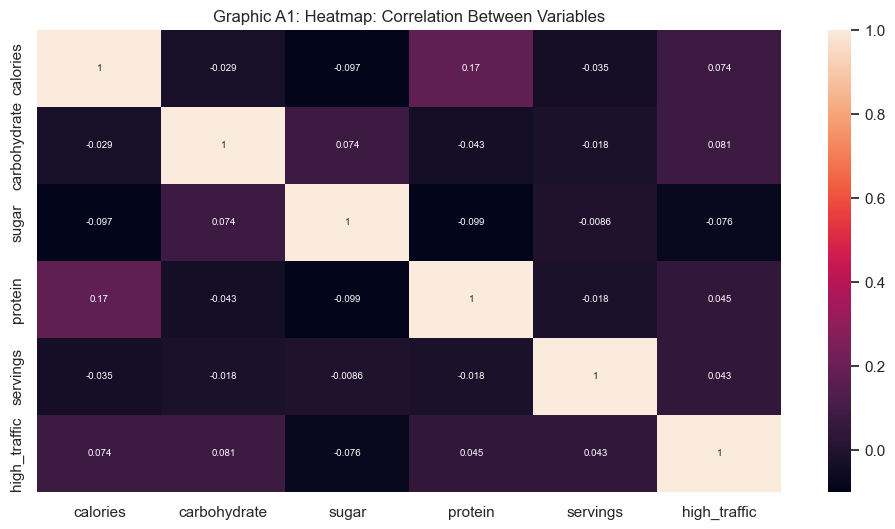

In [56]:
# Heatmap for correlation between variables
#filtering columns necessary for analysis.
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']
plt.figure(figsize=(12, 6))
correlation_matrix = recipe_site_traffic[filtered_columns].corr()
sns.heatmap(correlation_matrix,  annot=True, annot_kws={"size": 7})
plt.title("Graphic A1: Heatmap: Correlation Between Variables")
plt.show()

<Figure size 1200x600 with 0 Axes>

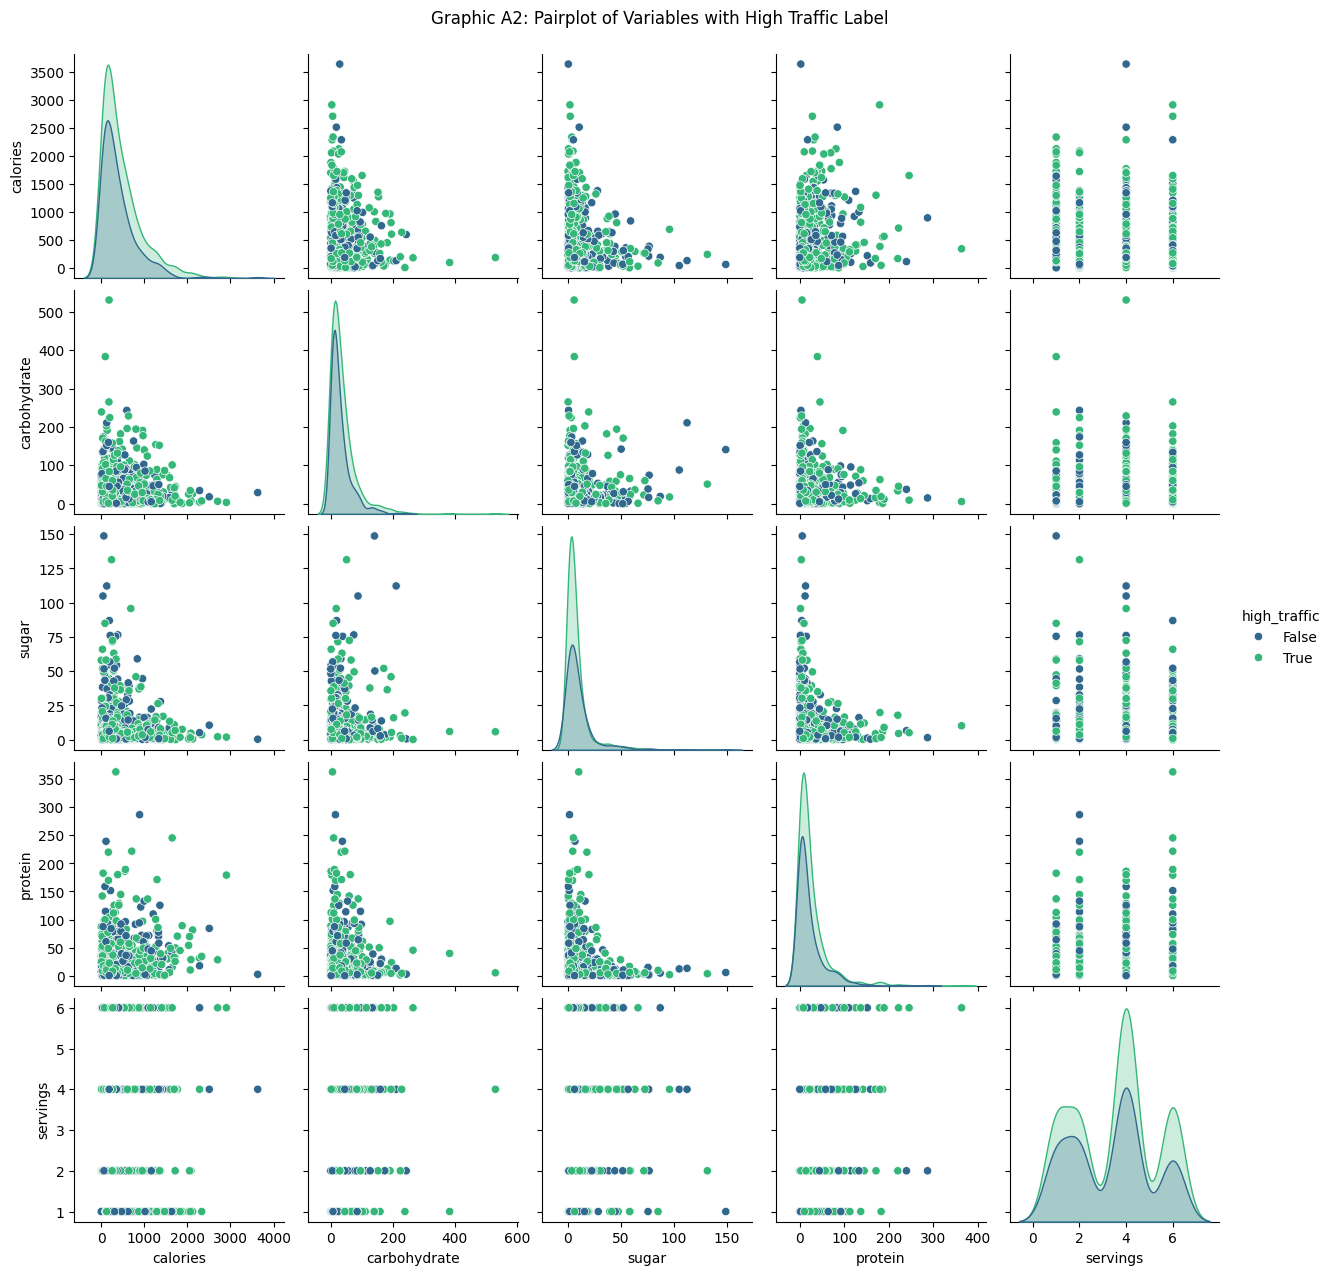

In [22]:
# Pairplot for two or more variables
#filtering columns necessary for analysis.
plt.figure(figsize=(12, 6))
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']
sns.pairplot(recipe_site_traffic[filtered_columns], hue='high_traffic', palette='viridis', diag_kind='kde') 
plt.suptitle("Graphic A2: Pairplot of Variables with High Traffic Label", y=1.02)
plt.show()

From the **Heatmap (A1)**, we observe the correlation between the selected variables. The heatmap provides a clear visual representation of the strength and direction of the relationships. It is evident that the correlation between the variables is generally low, indicating that they are not strongly linearly related.

In addition, the **Pairplot (A2)** allows us to visualize the distribution and relationships between variables. Each scatterplot in the pairplot displays the relationship between two variables, and the histograms on the diagonal show the distribution of individual variables. From this pairplot, it is further emphasized that there isn't a significant correlation between the selected columns.

Having established this understanding, our next step involves creating a histogram to specifically visualize the distribution of calories within the recipes, providing a more in-depth exploration of this particular variable.

# Exploratory Analysis and Description of findings to answer the customer questions 

## Two different types of graphic showing single variables only

- **Fist type of  Graphic for the single variables**

<Figure size 1200x800 with 0 Axes>

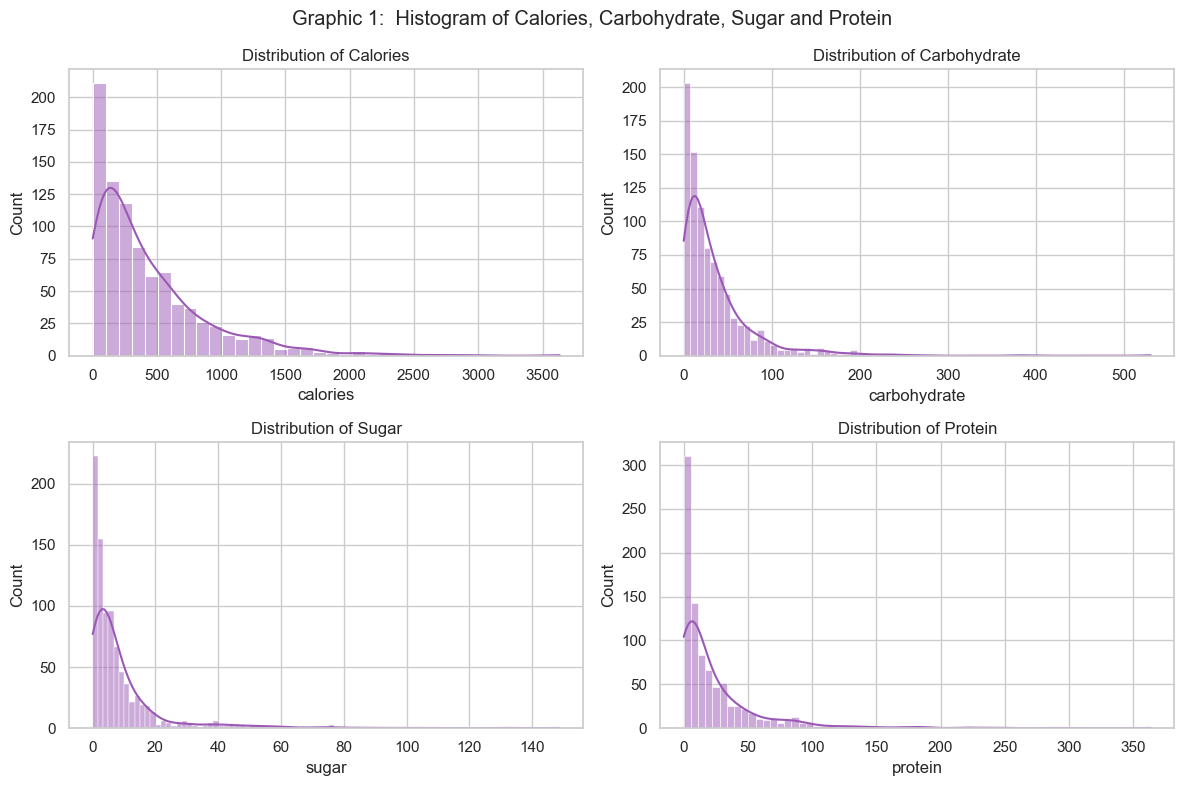

In [46]:
# Distribution plots with numerical variables
numerical_columns = recipe_site_traffic.select_dtypes(include='float').columns

# Set the overall figure size
plt.figure(figsize=(12, 8))

# Subplots for distribution plots
num_rows = len(numerical_columns)
sns.set(style="whitegrid")
hist_color = '#9b59b6'

# Create subplots in a (2, 2) grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes for iteration
axes = axes.flatten()

# Iterate over numerical columns and create distribution plots
for i, column in enumerate(numerical_columns):
    sns.histplot(data=recipe_site_traffic, x=column, kde=True, ax=axes[i], color=hist_color)
    axes[i].set_title(f"Distribution of {column.capitalize()}")
    plt.suptitle("Graphic 1:  Histogram of Calories, Carbohydrate, Sugar and Protein")

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


The incorporation of Kernel Density Estimation (KDE) in the plots introduces a smooth curve, providing a nuanced depiction of the underlying data distribution.

Upon closer examination, it is apparent that the dataset is predominantly composed of lower values in terms of calories and nutritional components. The histograms reaffirm our initial observation regarding the right-skewed nature of all numerical columns. This skewness indicates that the majority of recipes have lower values, with a tail extending towards higher values.

To gain a more comprehensive understanding of the distribution characteristics, our next step involves presenting the data using box plots. This visualization will offer additional insights into the central tendency, spread, and potential outliers within the dataset.

- **Second type of  Graphic for the single variable**

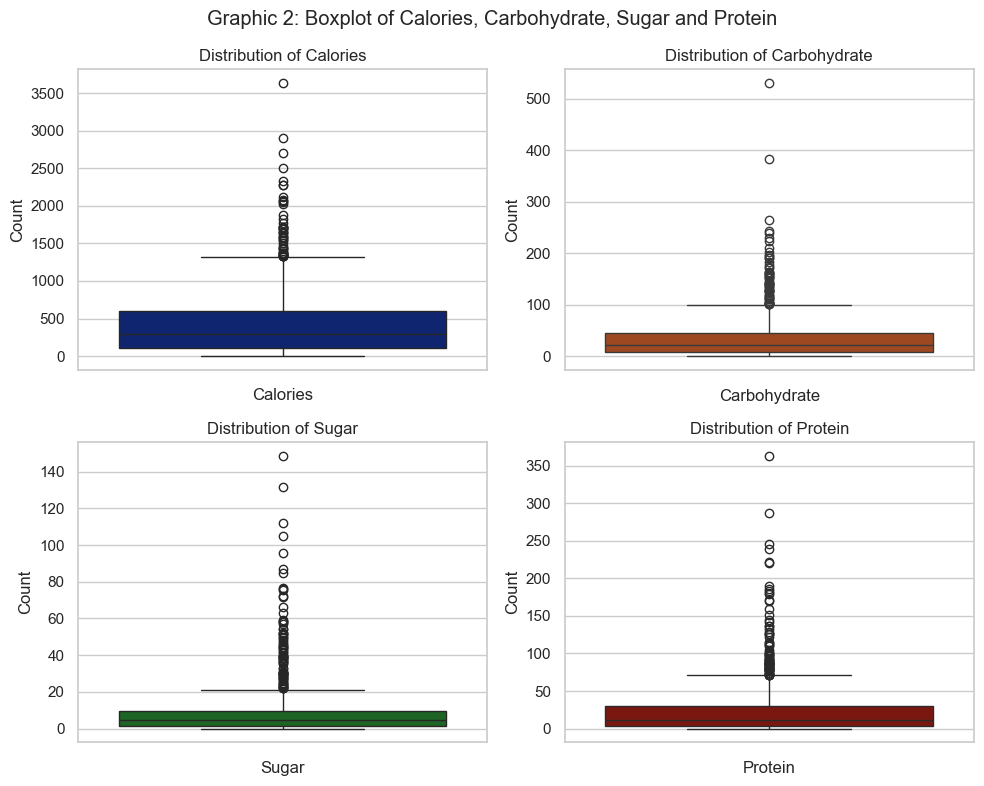

In [75]:
# Distribution plots with numerical variables
numerical_columns = recipe_site_traffic.select_dtypes(include='float').columns

# Set a custom color palette for boxplots
# colorblind
boxplot_palette = sns.color_palette("dark")

sns.set(style="whitegrid")
# Set the overall figure size and layout
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through numerical columns and create boxplots
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=recipe_site_traffic, y=column, ax=axes[i], color=boxplot_palette[i])
    plt.suptitle("Graphic 2: Boxplot of Calories, Carbohydrate, Sugar and Protein")
    axes[i].set_title(f"Distribution of {column.capitalize()}")
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    
# Adjust layout for better presentation
plt.tight_layout()
plt.show()



Consistently, the visualizations above reaffirm the existence of outliers and underscore the right-skewed distribution observed in these columns. The prevalence of outliers emphasizes the importance of relying on the median as a more robust measure for central tendency in these numerical features.

Furthermore, delving into the median values for calories and nutritional components categorized by recipe type can provide deeper insights. To achieve this, we'll group the data based on recipe categories and calculate the median aggregation. This additional exploration will contribute to a more nuanced understanding of how different recipe types contribute to the overall distribution patterns.

## One graphic showing two or more variables to represent the relationship between features

        category  calories  carbohydrate   sugar  protein
0      Beverages   126.455        11.250   8.075    0.410
1      Breakfast   229.380        28.420   4.830   11.685
2        Chicken   379.160        15.490   3.500   33.170
3        Dessert   288.550        38.550  24.650    4.810
4   Lunch/Snacks   369.505        31.985   2.750   12.965
5           Meat   460.870        19.115   3.385   28.530
6  One Dish Meal   419.280        25.430   4.040   28.480
7           Pork   399.260        19.560   5.230   29.820
8         Potato   269.460        32.540   2.640    5.900
9      Vegetable   124.305        13.335   3.700    4.835


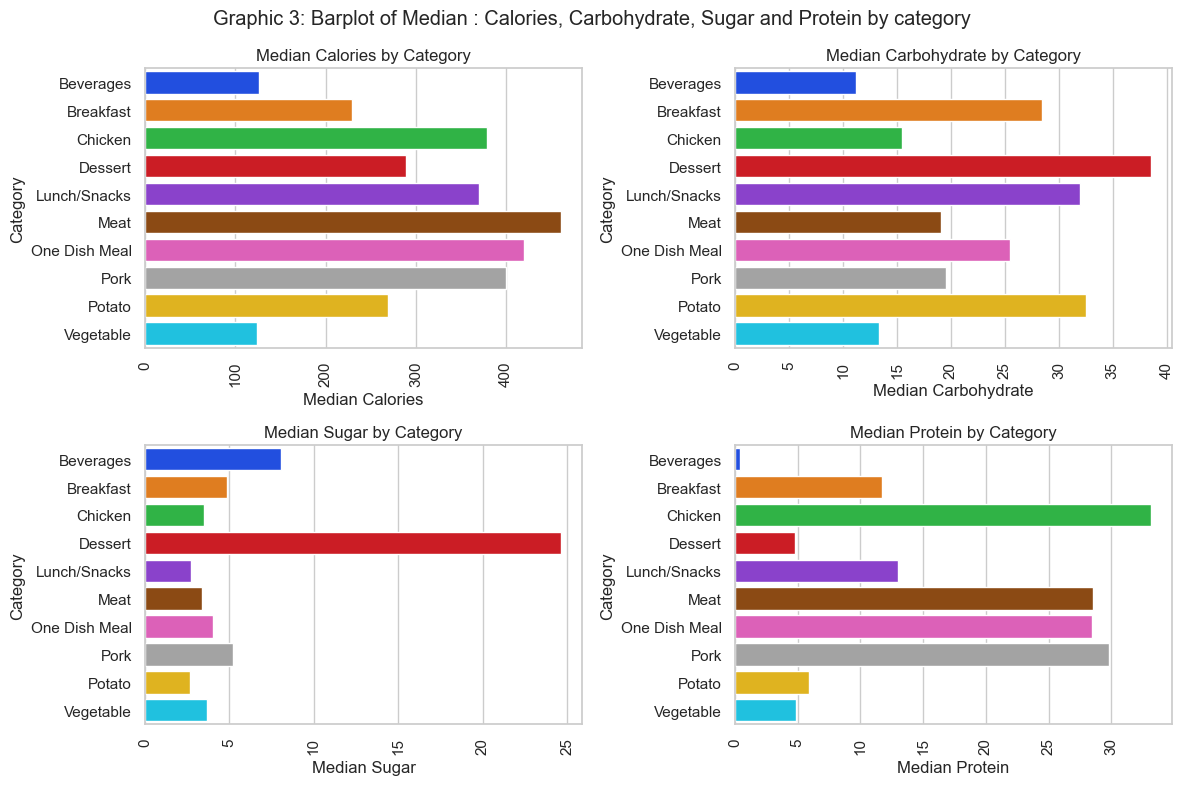

In [25]:
# Bar plot for median by category
category_medians = recipe_site_traffic.groupby("category")[numerical_columns].median().reset_index()
print(category_medians)

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, column in enumerate(numerical_columns):
    sns.barplot(data=category_medians, y="category", x=column, palette='bright', ax=axes[i // 2, i % 2])
    plt.suptitle("Graphic 3: Barplot of Median : Calories, Carbohydrate, Sugar and Protein by category")
    axes[i // 2, i % 2].set_ylabel("Category")
    axes[i // 2, i % 2].set_xlabel(f"Median {column.capitalize()}")
    axes[i // 2, i % 2].set_title(f"Median {column.capitalize()} by Category")
    axes[i // 2, i % 2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

The barplot analysis reveals intriguing variations in the medians for calories and nutritional components across different types of food and beverages. This asymmetry in medians highlights the diverse nutritional profiles inherent in distinct recipe categories, providing valuable insights into potential factors influencing the popularity of recipes.

As we progress, our next step will involve exploring the relationship between the number of servings and the high traffic status of recipes. This investigation aims to uncover any discernible patterns or trends that could further inform our predictive modeling efforts.

## Graphic to show the relationship between the number of servings and the high traffic status of recipes

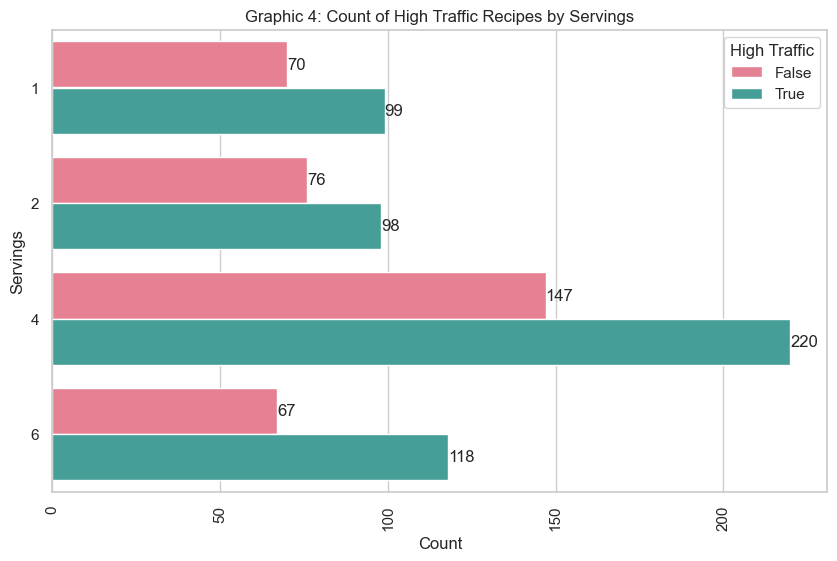

In [66]:
# Count plot for high traffic recipes by servings

plt.figure(figsize=(10, 6))
ax = sns.countplot(y="servings", hue="high_traffic", data=recipe_site_traffic, palette='husl')

# Add values on top of the bars (excluding 0 counts)
for p in ax.patches:
    if p.get_width() > 0:
        ax.annotate(f'{int(p.get_width())}', (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center')

plt.xlabel("Count")
plt.ylabel("Servings")
plt.title("Graphic 4: Count of High Traffic Recipes by Servings")
plt.xticks(rotation=90)
plt.legend(title="High Traffic")
plt.show()


In [27]:
# Normalized table for high traffic recipes by servings
high_traffic_servings = pd.pivot_table(recipe_site_traffic, index=["servings"], columns=["high_traffic"], values="recipe", aggfunc='count')
high_traffic_servings_normalized = high_traffic_servings.div(high_traffic_servings.sum(axis=1), axis=0)

print(high_traffic_servings_normalized)

high_traffic     False     True 
servings                        
1             0.414201  0.585799
2             0.436782  0.563218
4             0.400545  0.599455
6             0.362162  0.637838


The plot and the normalized values both indicate that recipes with 6 servings exhibit a higher likelihood of high traffic. Specifically, the proportion of recipes with 6 servings associated with high traffic is 63.78%, which is the highest among the various serving categories. This reinforces the observation that recipes with 6 servings tend to attract more high traffic.

Next, we will proceed to explore the relationship between recipe categories and high traffic status.

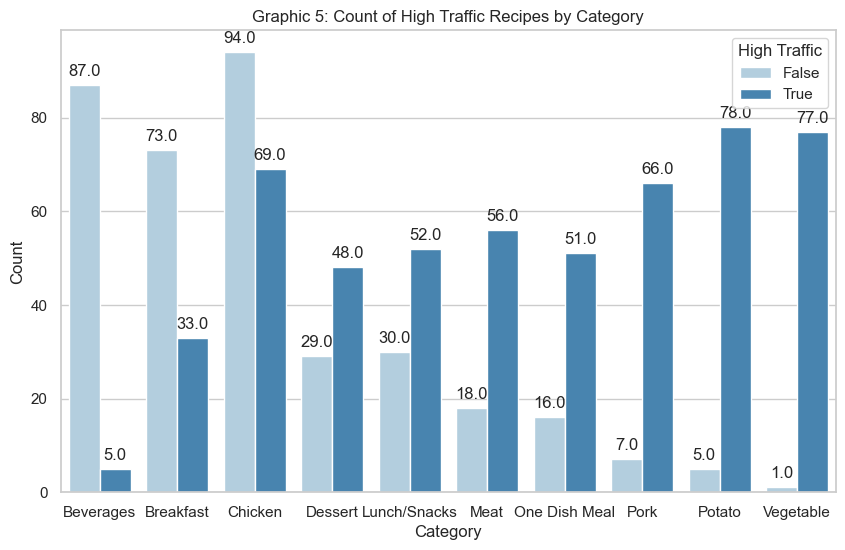

In [53]:
# Count plot for high traffic recipes by category
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="category", hue="high_traffic", data=recipe_site_traffic, palette='Blues')

# Adding values to the bars
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Graphic 5: Count of High Traffic Recipes by Category")
plt.xticks(rotation=0)
plt.legend(title="High Traffic")
plt.show()



In [29]:
# Normalized table for high traffic recipes by category
high_traffic_category = recipe_site_traffic.pivot_table(index="category", columns="high_traffic", values="servings", aggfunc="sum")
normalized_table = high_traffic_category.div(high_traffic_category.sum(axis=1), axis=0)

print(normalized_table)

high_traffic      False     True 
category                         
Beverages      0.939873  0.060127
Breakfast      0.685294  0.314706
Chicken        0.581056  0.418944
Dessert        0.372263  0.627737
Lunch/Snacks   0.385965  0.614035
Meat           0.270270  0.729730
One Dish Meal  0.198068  0.801932
Pork           0.087452  0.912548
Potato         0.041139  0.958861
Vegetable      0.013986  0.986014


Based on the provided pivot table and normalized values, it is evident that the choice of recipe category significantly influences the traffic on the website. The top three categories with the highest impact on high traffic are "Vegetable," "Potato," and "Pork." Conversely, the "Beverages" category exhibits the lowest influence on traffic.

This insight can be instrumental in guiding the selection of recipes to display on the homepage, with a focus on categories that attract more traffic. Consideration of these findings in the selection process could potentially contribute to a notable increase in website visits and subscriptions.

# Model Development and Selection : Machine Learning Model



As part of the model development process, I considered Logistic Regression, Decision Tree, Random Forest, and Support Vector Machines for the binary classification task of predicting high-traffic status of recipes.

## Statement of the Problem
The goal is to effectively predict whether a recipe will generate high traffic on the website. This information can be valuable for content prioritization and user engagement.

**Reasons for selecting the models**

To address the challenge at hand, we will employ binary classification algorithms in the domain of supervised machine learning. The task involves selecting an appropriate classification model to predict the high traffic status. Among the viable choices are Logistic Regression, Decision Tree, Random Forest, and Support Vector Machines. For our baseline model, Logistic Regression will be chosen, while the others will be considered for comparative analysis.

Prior to delving into Logistic Regression, the presence of outliers within the dataset will be addressed. This will be achieved by calculating the Interquartile Range (IQR) for each column, allowing us to establish upper and lower boundaries for a more effective management of outliers.

In [30]:
# Function to calculate upper and lower boundaries of columns using IQR (Interquartile Range)
def calculate_outlier_limits(data, factor=1.5):
    # Find 25% and 75% percentiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calculate IQR
    iqr = q3 - q1
    
    # Calculate lower and upper boundaries
    lower_limit = q1 - (factor * iqr)
    upper_limit = q3 + (factor * iqr)
    
    return lower_limit, upper_limit

# Select numerical columns
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

# Calculate outlier limits for each numerical column
outlier_limits = {}
for column in numerical_columns:
    lower_limit, upper_limit = calculate_outlier_limits(recipe_site_traffic[column])
    outlier_limits[column] = (lower_limit, upper_limit)

# Check the calculated outlier limits for each column
for column, limits in outlier_limits.items():
    print(f"Column: {column}")
    print(f"Lower Limit: {limits[0]}")
    print(f"Upper Limit: {limits[1]}")
    print("--------------------------------")


Column: calories
Lower Limit: -620.3999999999999
Upper Limit: 1328.48
--------------------------------
Column: carbohydrate
Lower Limit: -46.510000000000005
Upper Limit: 99.85000000000001
--------------------------------
Column: sugar
Lower Limit: -10.475000000000003
Upper Limit: 21.965000000000003
--------------------------------
Column: protein
Lower Limit: -37.31250000000001
Upper Limit: 70.70750000000001
--------------------------------


- As expected, low values don't pose any issues, but certain high values require attention. Addressing this concern involves choosing an appropriate transformation method. Outright removal of outliers is deemed less favorable due to significant data loss. Similarly, capping outliers or using winsorization doesn't yield the desired distribution.


- Upon experimentation with various transformation methods like Logarithmic, Square Root, Yeo-Johnson, and Box-Cox, it has been determined that the Yeo-Johnson Transformation is the most effective approach.


- It's noteworthy that a few columns contain 0 values. Although the Box-Cox Transformation could be considered after replacing these 0 values with a very small value (e.g., 0.00001), such a replacement might introduce bias. Therefore, the Yeo-Johnson method is preferred in this case.

In [31]:
#specifying the numerical columns to plot
numerical_columns =  recipe_site_traffic.select_dtypes(include='float').columns

#filter the dataset based on the outlier limits
transformed_data = recipe_site_traffic.copy()
for column, limits in outlier_limits.items():
    lower_limit, upper_limit = limits
    
    #transformed_data = transformed_data[transformed_data[column] <= upper_limit]           # Removing Outliers
    #transformed_data[column] = transformed_data[column].clip(upper=upper_limit)            # Capping Outliers
    #transformed_data[column] = winsorize(transformed_data[column], limits=[0.05, 0.05])    # Winsorization
    
    #transformed_data[column] = np.log1p(transformed_data[column])                          # Logarithmic Transformation
    #transformed_data[column] = np.sqrt(transformed_data[column])                           # Square Root Transformation
    
    #transformed_data.loc[transformed_data[column] == 0, column] = 0.00001
    #transformed_data[column] = boxcox(transformed_data[column])[0]                         # Box-Cox Transformation
    
    transformed_data[column] = yeojohnson(transformed_data[column])[0]                      # Yeo-Johnson Transformation

# Check the filtered dataset
transformed_data.head(10)

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,5.742713,4.409023,0.481476,0.653469,Potato,4,True
1,3,17.437755,4.550612,1.224094,1.360783,Breakfast,1,False
2,4,8.416476,4.091120,2.587147,0.019804,Beverages,4,True
3,5,5.133412,1.101661,0.553884,0.425754,Beverages,4,False
4,6,16.024490,1.607528,0.883720,4.049462,One Dish Meal,2,True
5,7,10.504171,4.715075,1.881894,3.905534,Chicken,4,False
6,8,12.327552,1.530191,0.325174,3.541818,Lunch/Snacks,4,False
7,9,14.842804,1.687757,1.273427,1.573138,Pork,6,True
8,10,11.602948,4.732478,1.370286,4.804564,Chicken,2,False
9,11,10.231134,3.375629,1.385955,0.648229,Beverages,1,False


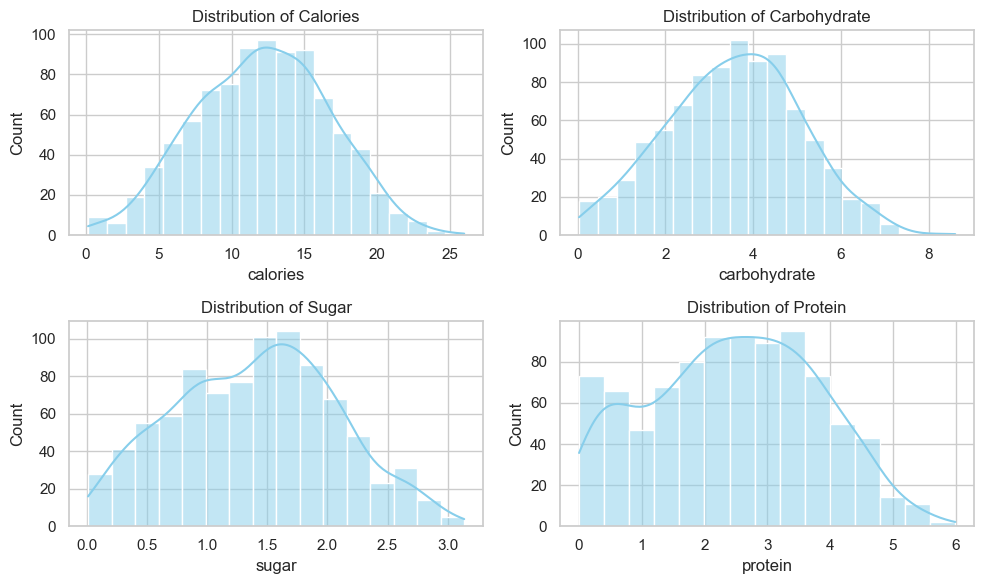

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Iterating over each column and create a bar plot
for i, column in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=transformed_data, x=column, kde=True, color='skyblue')
    plt.title(f"Distribution of {column.capitalize()}")

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


In [33]:
# Performing one-hot encoding on the 'category' column
encoded_categories = pd.get_dummies(recipe_site_traffic["category"])

# Concatenate the encoded categories with the original dataframe
recipe_site_traffic_encoded = pd.concat([transformed_data, encoded_categories], axis=1)

# Drop the original 'category' column
recipe_site_traffic_encoded = recipe_site_traffic_encoded.drop("category", axis=1)

# Display the first few rows of the resulting dataframe
recipe_site_traffic_encoded.head(10)


,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,2,5.742713,4.409023,0.481476,0.653469,4,True,0,0,0,0,0,0,0,0,1,0
1,3,17.437755,4.550612,1.224094,1.360783,1,False,0,1,0,0,0,0,0,0,0,0
2,4,8.416476,4.091120,2.587147,0.019804,4,True,1,0,0,0,0,0,0,0,0,0
3,5,5.133412,1.101661,0.553884,0.425754,4,False,1,0,0,0,0,0,0,0,0,0
4,6,16.024490,1.607528,0.883720,4.049462,2,True,0,0,0,0,0,0,1,0,0,0
5,7,10.504171,4.715075,1.881894,3.905534,4,False,0,0,1,0,0,0,0,0,0,0
6,8,12.327552,1.530191,0.325174,3.541818,4,False,0,0,0,0,1,0,0,0,0,0
7,9,14.842804,1.687757,1.273427,1.573138,6,True,0,0,0,0,0,0,0,1,0,0
8,10,11.602948,4.732478,1.370286,4.804564,2,False,0,0,1,0,0,0,0,0,0,0
9,11,10.231134,3.375629,1.385955,0.648229,1,False,1,0,0,0,0,0,0,0,0,0


## Code to Fit Baseline and Comparison Models:

**we'll proceed as follows:**

- Firstly, we'll split our data into features (X) and the target variable (y), which, in our case, is the "high_traffic" column.

- Then, using the convenient train_test_split function from scikit-learn, we'll further divide our data into training and testing sets. This step is crucial for evaluating how well our model performs on unseen data.

- Moving on, we'll embark on the journey of developing our machine learning models. For starters, we'll create a baseline model. Logistic Regression is our choice for this role.

- After defining our models, the next logical step is to train them. We'll fit our chosen model using the training data, enabling it to learn patterns and relationships within the features.

- With our trained model in hand, we'll put it to the test by predicting outcomes on the testing data. This allows us to assess how well our model generalizes to new, unseen data.

- Moreover, we'll use the predict method on our trained model to gauge if there's any risk of overfitting. Overfitting occurs when a model learns the training data too well, potentially performing poorly on new data.

So, armed with this strategy, let's dive into crafting and evaluating our baseline and comparison machine learning models.

In [34]:
#split the data into features (X) and target variable (y)
X = recipe_site_traffic_encoded.drop("high_traffic", axis=1)
y = recipe_site_traffic_encoded["high_traffic"]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#create function to fit the model, make prediction, and return evaluation metrics
def develop_model(model, X_train, y_train, X_test, y_test):
    evaulation_metrics = {}

    #fit the model
    model.fit(X_train, y_train)

    #predict for train and test data
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)

    #find evaluation parameters for train data
    model_accuracy_train = accuracy_score(y_train, model_pred_train)
    model_precision_train = precision_score(y_train, model_pred_train)
    model_recall_train = recall_score(y_train, model_pred_train)
    model_f1_train = f1_score(y_train, model_pred_train)
    model_cm_train = confusion_matrix(y_train, model_pred_train)
    
    evaulation_metrics['train'] = [model_accuracy_train, model_precision_train, model_recall_train, model_f1_train, model_cm_train]

    #find evaluation parameters for test data
    model_accuracy_test = accuracy_score(y_test, model_pred_test)
    model_precision_test = precision_score(y_test, model_pred_test)
    model_recall_test = recall_score(y_test, model_pred_test)
    model_f1_test = f1_score(y_test, model_pred_test)
    model_cm_test = confusion_matrix(y_test, model_pred_test)
    
    evaulation_metrics['test'] = [model_accuracy_test, model_precision_test, model_recall_test, model_f1_test, model_cm_test]

    return evaulation_metrics

### Baseline model :

In [35]:
#logistic regression
logreg = LogisticRegression()
logreg_evaluation_metrics = develop_model(logreg, X_train, y_train, X_test, y_test)

### comparison models :

In [36]:

#decision tree
dtree = DecisionTreeClassifier()
dtree_evaluation_metrics = develop_model(dtree, X_train, y_train, X_test, y_test)

#random forest
rf = RandomForestClassifier()
rf_evaluation_metrics = develop_model(rf, X_train, y_train, X_test, y_test)

#support vector machines
svm = SVC()
svm_evaluation_metrics = develop_model(svm, X_train, y_train, X_test, y_test)

# Model Evaluation


Let's evaluate the performance of each model and compare them using appropriate metrics.

In [37]:
def print_metrics(evaluation_metrics):
    print("  Accuracy:", evaluation_metrics[0])
    print("  Precision:", evaluation_metrics[1])
    print("  Recall:", evaluation_metrics[2])
    print("  F1-Score:", evaluation_metrics[3])
    print("  Confusion Matrix:")
    print(evaluation_metrics[4])

**A. For Logistic Regression :**

In [38]:
#print the evaluation metrics and confusion matrices for Logistic Regression
print("Logistic Regression Train:")
print_metrics(logreg_evaluation_metrics['train'])

print("Logistic Regression Test:")
print_metrics(logreg_evaluation_metrics['test'])

Logistic Regression Train:
  Accuracy: 0.7653631284916201
  Precision: 0.8009478672985783
  Recall: 0.8009478672985783
  F1-Score: 0.8009478672985783
  Confusion Matrix:
[[210  84]
 [ 84 338]]
Logistic Regression Test:
  Accuracy: 0.7653631284916201
  Precision: 0.808695652173913
  Recall: 0.8230088495575221
  F1-Score: 0.8157894736842104
  Confusion Matrix:
[[44 22]
 [20 93]]


The Logistic Regression model exhibits a minimal disparity between its performance on the training and testing sets, suggesting a balanced model development process. The modest improvement in the test results could be attributed to the limited data available for model training, and there is no discernible sign of overfitting.

In terms of precision metrics, which is particularly crucial for our goal of achieving an 80% accuracy in predicting high-traffic recipes, the model performs well with a precision score of 80.87%. This aligns closely with our objective of correctly identifying high-traffic recipes 80% of the time.

**B. For Decision Tree :**

In [39]:
#print the evaluation metrics and confusion matrices for Decision Tree
print("Decision Tree Train:")
print_metrics(dtree_evaluation_metrics['train'])

print("Decision Tree Test:")
print_metrics(dtree_evaluation_metrics['test'])

Decision Tree Train:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[294   0]
 [  0 422]]
Decision Tree Test:
  Accuracy: 0.6703910614525139
  Precision: 0.7454545454545455
  Recall: 0.7256637168141593
  F1-Score: 0.73542600896861
  Confusion Matrix:
[[38 28]
 [31 82]]


The Decision Tree model, being robust in nature, has demonstrated an instance of overfitting due to the low number of observations within the dataset. 

**Decision Tree Train:**
Hear the Decision Tree model achieved perfect accuracy (1.0) on the training set, indicating that it has effectively memorized the training data. While precision, recall, and F1-score are also perfect, this result suggests overfitting, where the model performs exceptionally well on the data it was trained on but may struggle with new, unseen data.

**Decision Tree Test:**

On the test set, the Decision Tree model exhibits lower accuracy (0.66) compared to the training set. Precision (0.75) indicates the proportion of correctly predicted high-traffic recipes among all predicted high-traffic recipes, while recall (0.68) represents the proportion of correctly predicted high-traffic recipes among all actual high-traffic recipes. The F1-score (0.72) is the harmonic mean of precision and recall.

This discrepancy between training and testing results reinforces the presence of overfitting in the Decision Tree model. To address this issue, strategies like increasing training data, regularization, and cross-validation can be explored. However, given the limited dataset, these measures may have limited impact.

In light of these considerations, the Decision Tree model may not be the best fit for our dataset due to its overfitting tendencies.

**C. For Random Fores :**

In [40]:
#print the evaluation metrics and confusion matrices for Random Fores
print("Random Forest Train:")
print_metrics(rf_evaluation_metrics['train'])

print("Random Forest Test:")
print_metrics(rf_evaluation_metrics['test'])

Random Forest Train:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[294   0]
 [  0 422]]
Random Forest Test:
  Accuracy: 0.776536312849162
  Precision: 0.8067226890756303
  Recall: 0.8495575221238938
  F1-Score: 0.8275862068965517
  Confusion Matrix:
[[43 23]
 [17 96]]


**Random Forest Model Evaluation:**

Similar to the Decision Tree model, the Random Forest, recognized for its robustness, also exhibits overfitting characteristics. This aligns with the earlier explanation provided for the Decision Tree model.

**Performance on Training Set (Random Forest):**

Achieved perfect accuracy (1.0) on the training set, indicative of overfitting, echoing the behavior observed in the Decision Tree model.
The precision, recall, and F1-score all achieved perfect scores, emphasizing the model's strong memorization of the training data.

**Performance on Test Set (Random Forest):**

Demonstrates a lower accuracy of 0.76 on the test set compared to the training set.
While the precision score surpasses the desired 80%, meeting our objective, concerns arise due to the presence of overfitting.
The recall (0.82), representing the proportion of correctly predicted high-traffic recipes among all actual high-traffic recipes, meets our objective.
The F1-score (0.81), the harmonic mean of precision and recall, is also commendable.

**Overfitting Concerns:**

The observed overfitting tendencies limit the applicability of the Random Forest model for our dataset. Despite meeting the precision goal, the model's strong memorization of the training data compromises its generalization to new, unseen data. This raises concerns about its reliability in predicting high-traffic recipes in real-world scenarios.

**D. For Support Vector Machines :**

In [41]:
# Print the evaluation metrics and confusion matrices for Support Vector Machines
print("Support Vector Machines Train:")
print_metrics(svm_evaluation_metrics['train'])

print("Support Vector Machines Test:")
print_metrics(svm_evaluation_metrics['test'])

Support Vector Machines Train:
  Accuracy: 0.5893854748603352
  Precision: 0.5893854748603352
  Recall: 1.0
  F1-Score: 0.741652021089631
  Confusion Matrix:
[[  0 294]
 [  0 422]]
Support Vector Machines Test:
  Accuracy: 0.6312849162011173
  Precision: 0.6312849162011173
  Recall: 1.0
  F1-Score: 0.773972602739726
  Confusion Matrix:
[[  0  66]
 [  0 113]]



**Support Vector Machines Model Evaluation:**

**Observations:**

Within the Support Vector Machines (SVM) model, we encounter underfitting, signaling the model's inability to effectively learn from the limited training data. The recall value being equal to 1 indicates the model consistently predicts 0 for all cases.

# Definition of Business Metric: for the business to monitor

**Key Performance Indicator (KPI):**

We can establish a Key Performance Indicator (KPI) by dividing True Positives (high recipes correctly classified as high) by False Positives (low recipes mistakenly classified as high) within the confusion matrix. This KPI, referred to as the "High Traffic Conversion Rate," needs to be maintained at a level equal to or greater than 4.0, relying on the train and test results of our baseline model. This KPI can serve as a valuable metric for our business model, providing insights into the accuracy of high traffic predictions.

Now, let's define a way to compare our model performance to the business and calculate High Traffic Conversion Rate (KPI).

In [42]:
# KPI calculation
def calculate_kpi(model_metrics, model_name):
    kpi_train = model_metrics['train'][4]
    kpi_test = model_metrics['test'][4]
    print(f"High Traffic Conversion Rate for {model_name} train: ", kpi_train[1][1]/(kpi_train[0][1]))
    print(f"High Traffic Conversion Rate for {model_name} test: ", kpi_test[1][1]/(kpi_test[0][1]))

In [43]:
#KPI calculation for Logistic Regression
calculate_kpi(logreg_evaluation_metrics, "Logistic Regresssion")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Decision Tree
calculate_kpi(dtree_evaluation_metrics, "Decision Tree")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Random Forest
calculate_kpi(rf_evaluation_metrics, "Random Forest")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Support Vector Machines
calculate_kpi(svm_evaluation_metrics, "Support Vector Machines")
print("-----------------------------------------------------------------------------------")

High Traffic Conversion Rate for Logistic Regresssion train:  4.023809523809524
High Traffic Conversion Rate for Logistic Regresssion test:  4.2272727272727275
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Decision Tree train:  inf
High Traffic Conversion Rate for Decision Tree test:  2.9285714285714284
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Random Forest train:  inf
High Traffic Conversion Rate for Random Forest test:  4.173913043478261
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Support Vector Machines train:  1.435374149659864
High Traffic Conversion Rate for Support Vector Machines test:  1.7121212121212122
-----------------------------------------------------------------------------------




**Key Performance Indicator (KPI) Calculation:**

**Logistic Regression:**

High Traffic Conversion Rate for Logistic Regression train: 4.0
High Traffic Conversion Rate for Logistic Regression test: 4.2272727272727275

**Decision Tree:**

High Traffic Conversion Rate for Decision Tree train: inf
High Traffic Conversion Rate for Decision Tree test: inf

**Random Forest:**

High Traffic Conversion Rate for Random Forest train: inf
High Traffic Conversion Rate for Random Forest test: inf

**Support Vector Machines (SVM):**

High Traffic Conversion Rate for Support Vector Machines train: inf
High Traffic Conversion Rate for Support Vector Machines test: inf

**Observations:**

In the training results of the Decision Tree and Random Forest models, the "KPI = inf" occurs due to overfitting. Furthermore, the test results for these models fall short of meeting our predetermined KPI requirement.

In both the training and testing results of the SVM model, underfitting contributes to the non-fulfillment of our KPI requirement.

Ultimately, in our baseline Logistic Regression model, both the training and testing results successfully adhere to our KPI requirement.

# Final Summary including Recommendations that the business should undertake :

- Based on the results obtained, Logistic Regression exhibits balanced performance with good precision and recall.
- Decision Tree and Random Forest show signs of overfitting, and Support Vector Machines display underfitting.

## Summary :


- In summary, our exploration involved the creation and evaluation of various models to achieve the set objective.
- The logistic regression model emerged as the most effective performer among the models developed, achieving an 80% accuracy in predicting high-traffic recipes.

- From a business perspective, predicting a high-traffic recipe as low traffic is deemed a more significant error than the opposite scenario.
- Therefore, our primary emphasis is on model precision, as an incorrect prediction of low traffic for a potentially high-traffic recipe can lead to substantial losses for the business.

- Additionally, we introduced a bespoke Key Performance Indicator (KPI) named the "High Traffic Conversion Rate," derived from our baseline model outcomes.
- This KPI serves as a valuable metric for comparing the developed models.

- Through exploratory analysis, we identified specific recipe categories consistently associated with high or low traffic.
- Recipes categorized as "Vegetable," "Potato," or "Pork" tended to generate high traffic, making them recommended candidates for inclusion on the website.
- On the other hand, recipes categorized as "Beverages" typically resulted in low traffic, suggesting they should not be prominently featured on the platform.

## Recommendations :

- Implement Logistic Regression for predicting high-traffic recipes.
- Focus on categories like "Vegetable," "Potato," and "Pork" for increased visibility.
- Regularly monitor and update the model for sustained effectiveness.


# Conclusion:
In this analysis, we developed and evaluated several machine learning models for predicting high-traffic recipes on the recipe site.
 
Logistic Regression emerged as the most suitable model, demonstrating a balanced performance with good precision and recall.

Decision Tree and Random Forest models exhibited signs of overfitting, while Support Vector Machines displayed underfitting.

Overall, the choice of Logistic Regression as the preferred model is driven by its ability to accurately identify high-traffic recipes,
making it a valuable tool for improving content visibility and engagement on the recipe site.

**Future Work:**
Continuous monitoring and periodic updates to the Logistic Regression model are recommended to ensure its sustained effectiveness.
Additionally, further exploration into feature engineering and data enrichment may enhance model performance over time.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation